# Caminatas cuánticas aleatorias: Caso clásico

El modelo básico de las caminatas aleatorias es el movimiento de una partícula (llamado caminante) sobre puntos discretos distribuidos en una línea sin restricciones. El sentido del movimiento del caminante (izquierda o derecha) depende de un
sistema bivaluado (una moneda), cuyos valores, para cada paso, dependen de la probabilidad. Si el resultado del voltado es sol(o bien 1, en nuestro caso), entonces el caminante dará un paso a la derecha, mientras que si cae águila (que posee el valor -1) el caminante hará lo contrario, y dará un paso hacia la izqierda. Cabe mencionar que durante todo el problema, el caminante partirá de un punto de inicio, cuyo valor será 0.  Después de muchos volados (digamos, cien), uno puede hacer varias preguntas interesantes, por ejemplo: ¿con qué frecuencia el caminante cae en la posición de inicio?

In [1]:
using PyPlot
Pkg.add("Plots")
using Plots

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Plots
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
#La rutina que se presenta a continuación es una recopilación  de diversas funciones. El input (n) corresponde al número de volados que se desea realizar.
function posicion_final(n)
    b=rand(-1:2:1,n)     #Usamos la función rand para generar valores aleatorios, éstos sólo podrán ser 1 (sol) y -1 (águila).
    p=0
    for i in 1:length(b)
    p=b[i]+p  #Se implementa un for para, una vez generados todos los valores de los volados, obtener la posición final del caminante, esto es simplemente la suma de todos ellos.
end
return p  #Finalmente, el valor p corresponde a la posición final del caminante después de n pasos.
end

posicion_final (generic function with 1 method)

In [3]:
#Sin embargo, a nosotros nos interesa hacer un análisis para  K número de caminantes. Ahora le pedimos al usuario tanto el número de volados "n", como el de caminantes "k"
function pf_caminantes(n,k) 
    listf=zeros(k)  # Construimos una lista con k entradas de ceros 
    for i in 1:k  #Este ciclo for se usa para encontrar la posición final de los k caminantes haciendo uso de la función de posicion_final (presentada anteriormente)
        d=posicion_final(n)
        listf[i]=d  
        end 
    return listf # Se imprime la lista con la posición final de los k caminantes.
    end

pf_caminantes (generic function with 1 method)

In [9]:
#Se implementa la función pf_caminantes para 10 volados y cien caminantes, a la cual llamaremos "CA"
CA=pf_caminantes(10,100)

100-element Array{Float64,1}:
  4.0
 -2.0
  2.0
  2.0
 -2.0
 -6.0
 -2.0
 -2.0
 -2.0
  0.0
  0.0
  2.0
  2.0
  ⋮  
 -2.0
 -2.0
  0.0
  4.0
 -2.0
 -2.0
 -2.0
 -6.0
  0.0
  2.0
 -2.0
  2.0

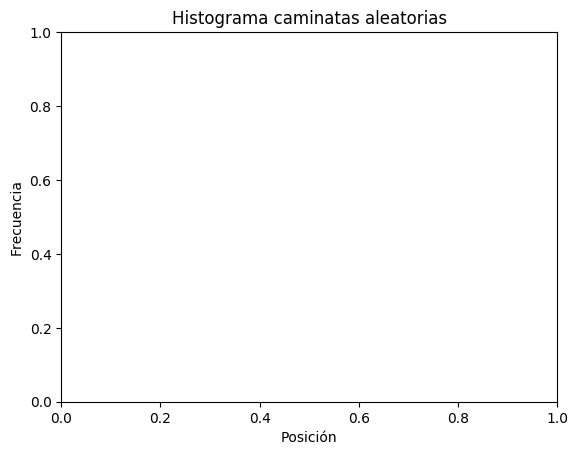

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [12]:
# Se presenta a continuación un histograma que fue construido a partir de los datos obtenidos en la lista CA.
Plots.histogram(CA)
title("Histograma caminatas aleatorias")
ylabel("Frecuencia"); 
xlabel("Posición");
legend()

La representación gráfica será un sustento contundente de los resultados hallados. Sin mayor dificultad es posible apreciar que  la posición final qe ocuparán con mayor frecuencia los cien caminantes, después de lanzar 10 volados, será el punto de partida (el 0). Se observa además, que a medida que la posición se aleja del 0, el caminante caerá con mucha menor frecuencia. Este comportamiento da como resultado una gráfica acampanada y simétrica respecto al punto de partida, también llamada campana de gauss.

Finalmente, le daremos a conocer al lector la rutina que nos permite calcular la probabilidad de encontrar a nuestro caminante en el lugar k, suponiendo que el movimiento comienza en la posición 0 y qe el caminante se ha movido n veces (esto es que se ha tirado n volados):

In [13]:
k=Array{Int64,1}(linspace(-20,20,41)); #Se construye un intervalo en el que se desplazará el caminante.

In [14]:
# Se construye la rutina CClasico que nos permite calclar la probabilidad con ayuda de una distribución binomial.
function CClasico(n,k)
    p=1/2   #p y q corresponder a la probabilidad de obtener águila o sol tras lanzar un volado.
    q=1/2
    P=Float64[]
    for i in 1:length(k)
    pr=((factorial(n))*(p^(0.5(n+k[i])))*(q^(0.5(n-k[i]))))/((factorial(0.5(k[i]+n)))*(factorial(0.5(n-k[i]))))
        push!(P,pr)
    end
    return P # Se imprime la lista de la probabilidad de encontrar a nuestro caminante en cada punto del intervalo k.
end

CClasico (generic function with 1 method)

In [15]:
#Se implementa la función CClasico para 20 volados, a la cual llamaremos "P"
P=CClasico(20,k);

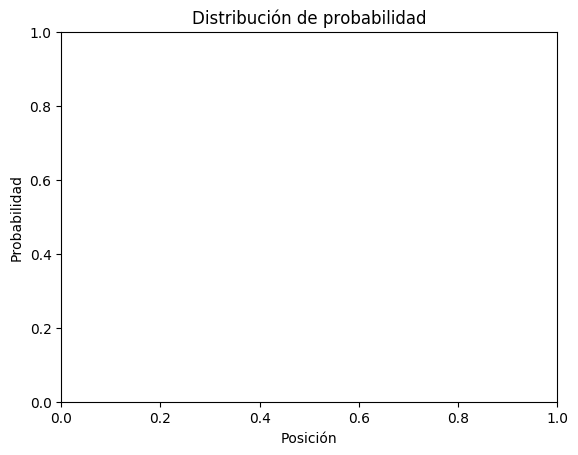

In [16]:
plot(k,P)
title("Distribución de probabilidad")
ylabel("Probabilidad"); 
xlabel("Posición");
legend()